# Overview
This project is a basic exploratory analysis of the california housing data set. Exploratory Data analysis is beneficial to find patterns, trends, and some potential problems such as missing data, heavily weighted data


In [19]:
import sklearn.datasets
import sklearn.decomposition
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

cal_housing = sklearn.datasets.fetch_california_housing()

cal_df = pd.DataFrame(cal_housing.data, columns = cal_housing.feature_names)
cal_target = pd.DataFrame(cal_housing.target, columns = ["target"])

First, it will be beneficial to look at some of the variables and their values, and we can examine the data types.

In [24]:
print(cal_df.head)
print(cal_target.head)
print(cal_df.dtypes)

<bound method NDFrame.head of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Lo

# Univariate analysis
The describe method is useful to get some basic univariate descriptive statistics. These include the count, mean, standard deviation, and 5 quantiles. 

In [3]:
print(cal_df.describe())


             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -1

Now for some visuals

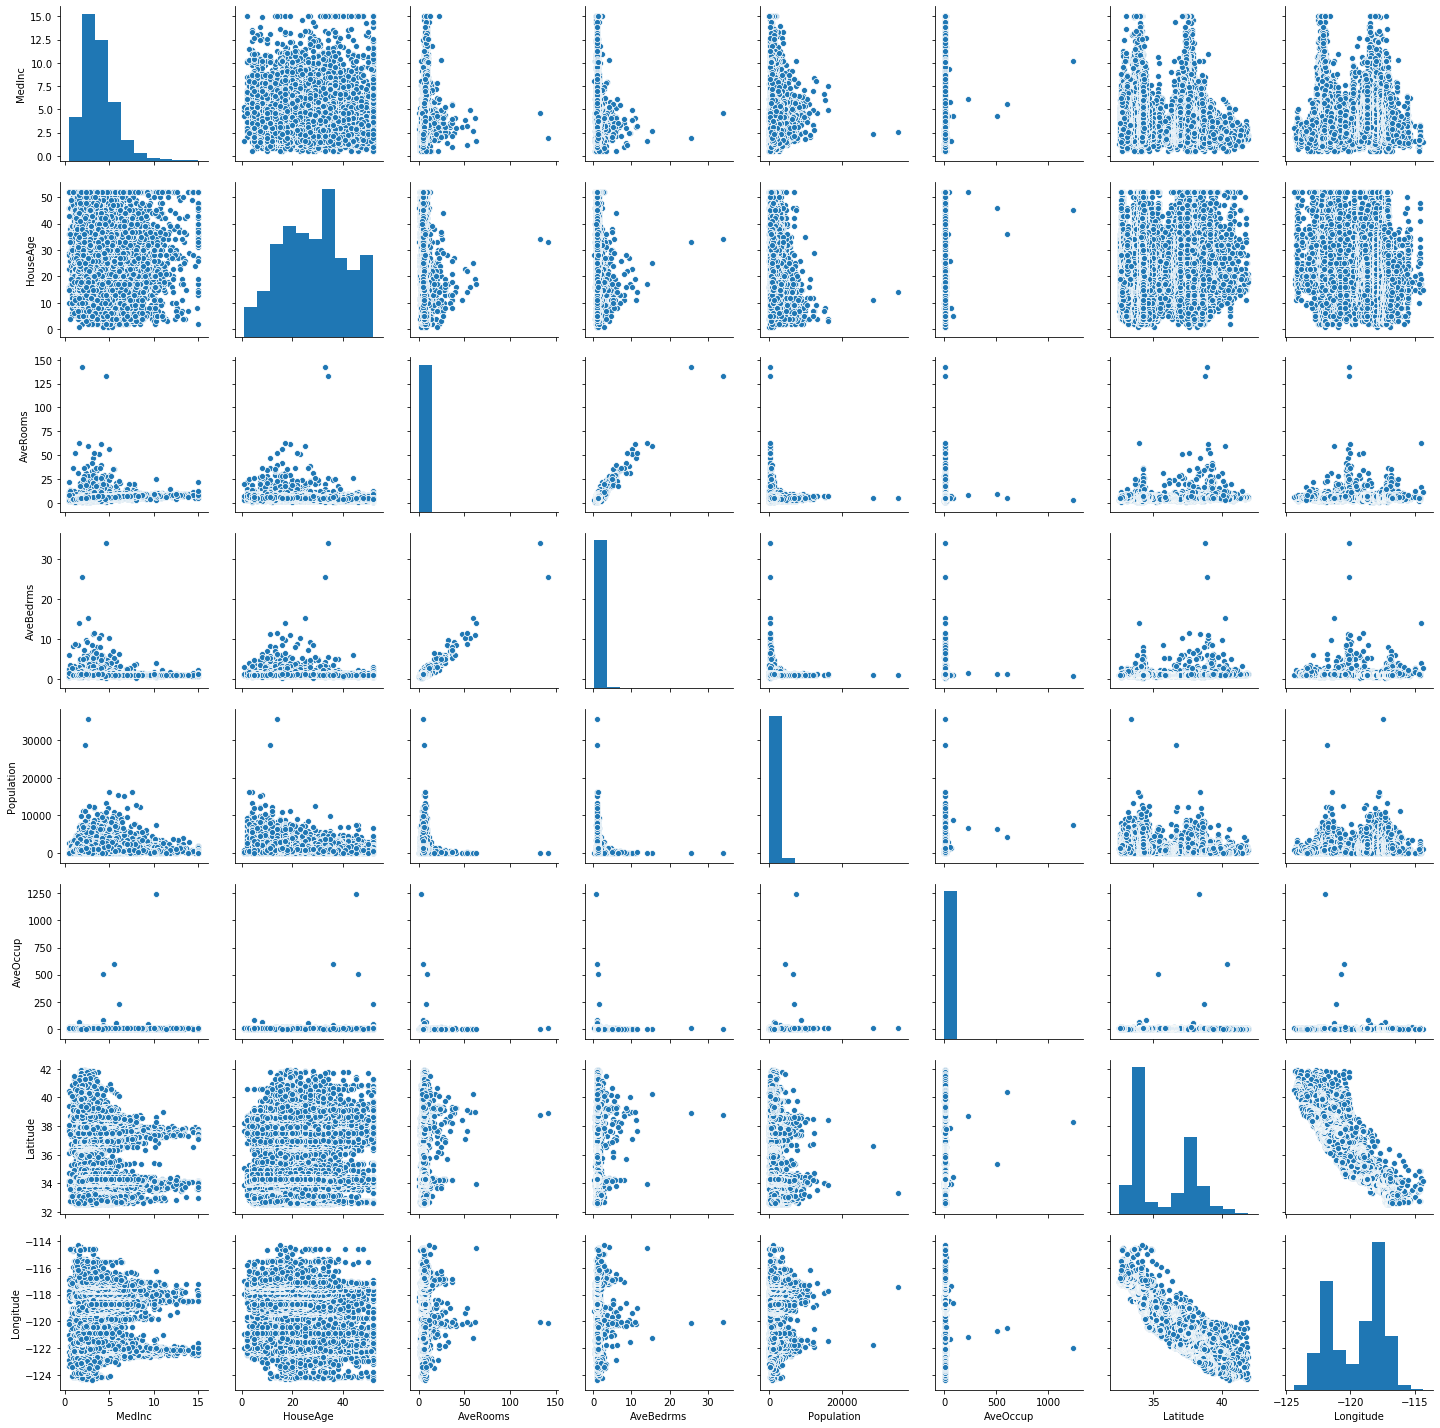

In [26]:
seaborn.pairplot(cal_df)


Since we have so many variables, I'd like to see how they trend on a parallel axis plot. However, this usually works best with a categorical target variable, so we will copy and categorize the target, before merging it into the original data set

In [25]:
from matplotlib import ticker

cols = ['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration']
x = [i for i, _ in enumerate(cols)]
colours = ['#2e8ad8', '#cd3785', '#c64c00', '#889a00']

# create dict of categories: colours
colours = {df['mpg'].cat.categories[i]: colours[i] for i, _ in enumerate(df['mpg'].cat.categories)}

# Create (X-1) sublots along x axis
fig, axes = plt.subplots(1, len(x)-1, sharey=False, figsize=(15,5))

# Get min, max and range for each column
# Normalize the data for each column
min_max_range = {}
for col in cols:
    min_max_range[col] = [df[col].min(), df[col].max(), np.ptp(df[col])]
    df[col] = np.true_divide(df[col] - df[col].min(), np.ptp(df[col]))

# Plot each row
for i, ax in enumerate(axes):
    for idx in df.index:
        mpg_category = df.loc[idx, 'mpg']
        ax.plot(x, df.loc[idx, cols], colours[mpg_category])
    ax.set_xlim([x[i], x[i+1]])
    
# Set the tick positions and labels on y axis for each plot
# Tick positions based on normalised data
# Tick labels are based on original data
def set_ticks_for_axis(dim, ax, ticks):
    min_val, max_val, val_range = min_max_range[cols[dim]]
    step = val_range / float(ticks-1)
    tick_labels = [round(min_val + step * i, 2) for i in range(ticks)]
    norm_min = df[cols[dim]].min()
    norm_range = np.ptp(df[cols[dim]])
    norm_step = norm_range / float(ticks-1)
    ticks = [round(norm_min + norm_step * i, 2) for i in range(ticks)]
    ax.yaxis.set_ticks(ticks)
    ax.set_yticklabels(tick_labels)

for dim, ax in enumerate(axes):
    ax.xaxis.set_major_locator(ticker.FixedLocator([dim]))
    set_ticks_for_axis(dim, ax, ticks=6)
    ax.set_xticklabels([cols[dim]])
    

# Move the final axis' ticks to the right-hand side
ax = plt.twinx(axes[-1])
dim = len(axes)
ax.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
set_ticks_for_axis(dim, ax, ticks=6)
ax.set_xticklabels([cols[-2], cols[-1]])


# Remove space between subplots
plt.subplots_adjust(wspace=0)

# Add legend to plot
plt.legend(
    [plt.Line2D((0,1),(0,0), color=colours[cat]) for cat in df['mpg'].cat.categories],
    df['mpg'].cat.categories,
    bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0.)

plt.title("Values of car attributes by MPG category")

plt.show()






cal_df_temp = cal_df.merge(cal_target, right_index=True, left_index=True)
#pd.plotting.parallel_coordinates(cal_df_temp, "target")
plt.show()

It appears that only about four of our variables have spread out distributions, and there is very limited correlation. The others are almost exclusively a single value, with a few sparse alternatives. The last two (latitude and longitude) appear to be bimodal. This is probably because two of the most expensive places to live are in silicon valley and in Los Angeles.

It would be interesting to see a location map colored by housing price. 

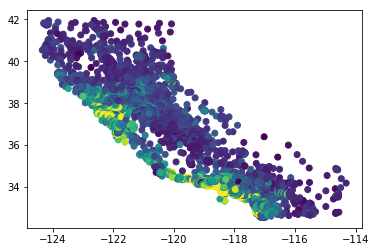

In [40]:
plt.scatter(x=cal_df["Longitude"], y=cal_df["Latitude"], c = cal_target)

                  0             1             2             3             4  \
count  2.064000e+04  2.064000e+04  2.064000e+04  2.064000e+04  2.064000e+04   
mean   1.238362e-13 -3.416733e-16 -3.635550e-16  6.081957e-15 -2.508372e-15   
std    1.132469e+03  1.205454e+01  1.033597e+01  2.874866e+00  2.564933e+00   
min   -1.422428e+03 -3.201997e+01 -2.870594e+01 -6.692250e+00 -6.236947e+00   
25%   -6.384857e+02 -9.532781e+00 -1.183778e+00 -2.367097e+00 -1.320798e+00   
50%   -2.594659e+02  5.933884e-01 -1.307700e-01 -1.318848e+00 -3.101403e-01   
75%    2.995021e+02  8.067277e+00  9.659725e-01  2.953204e+00  9.135571e-01   
max    3.425638e+04  1.788184e+02  1.223955e+03  3.443995e+01  1.202176e+02   

                  5             6             7  
count  2.064000e+04  2.064000e+04  2.064000e+04  
mean  -2.491321e-15  1.396505e-14 -1.142324e-15  
std    1.724486e+00  4.999316e-01  1.744415e-01  
min   -1.024407e+01 -3.493936e+00 -2.038732e+00  
25%   -7.370137e-01 -2.505901e-01 -9.7

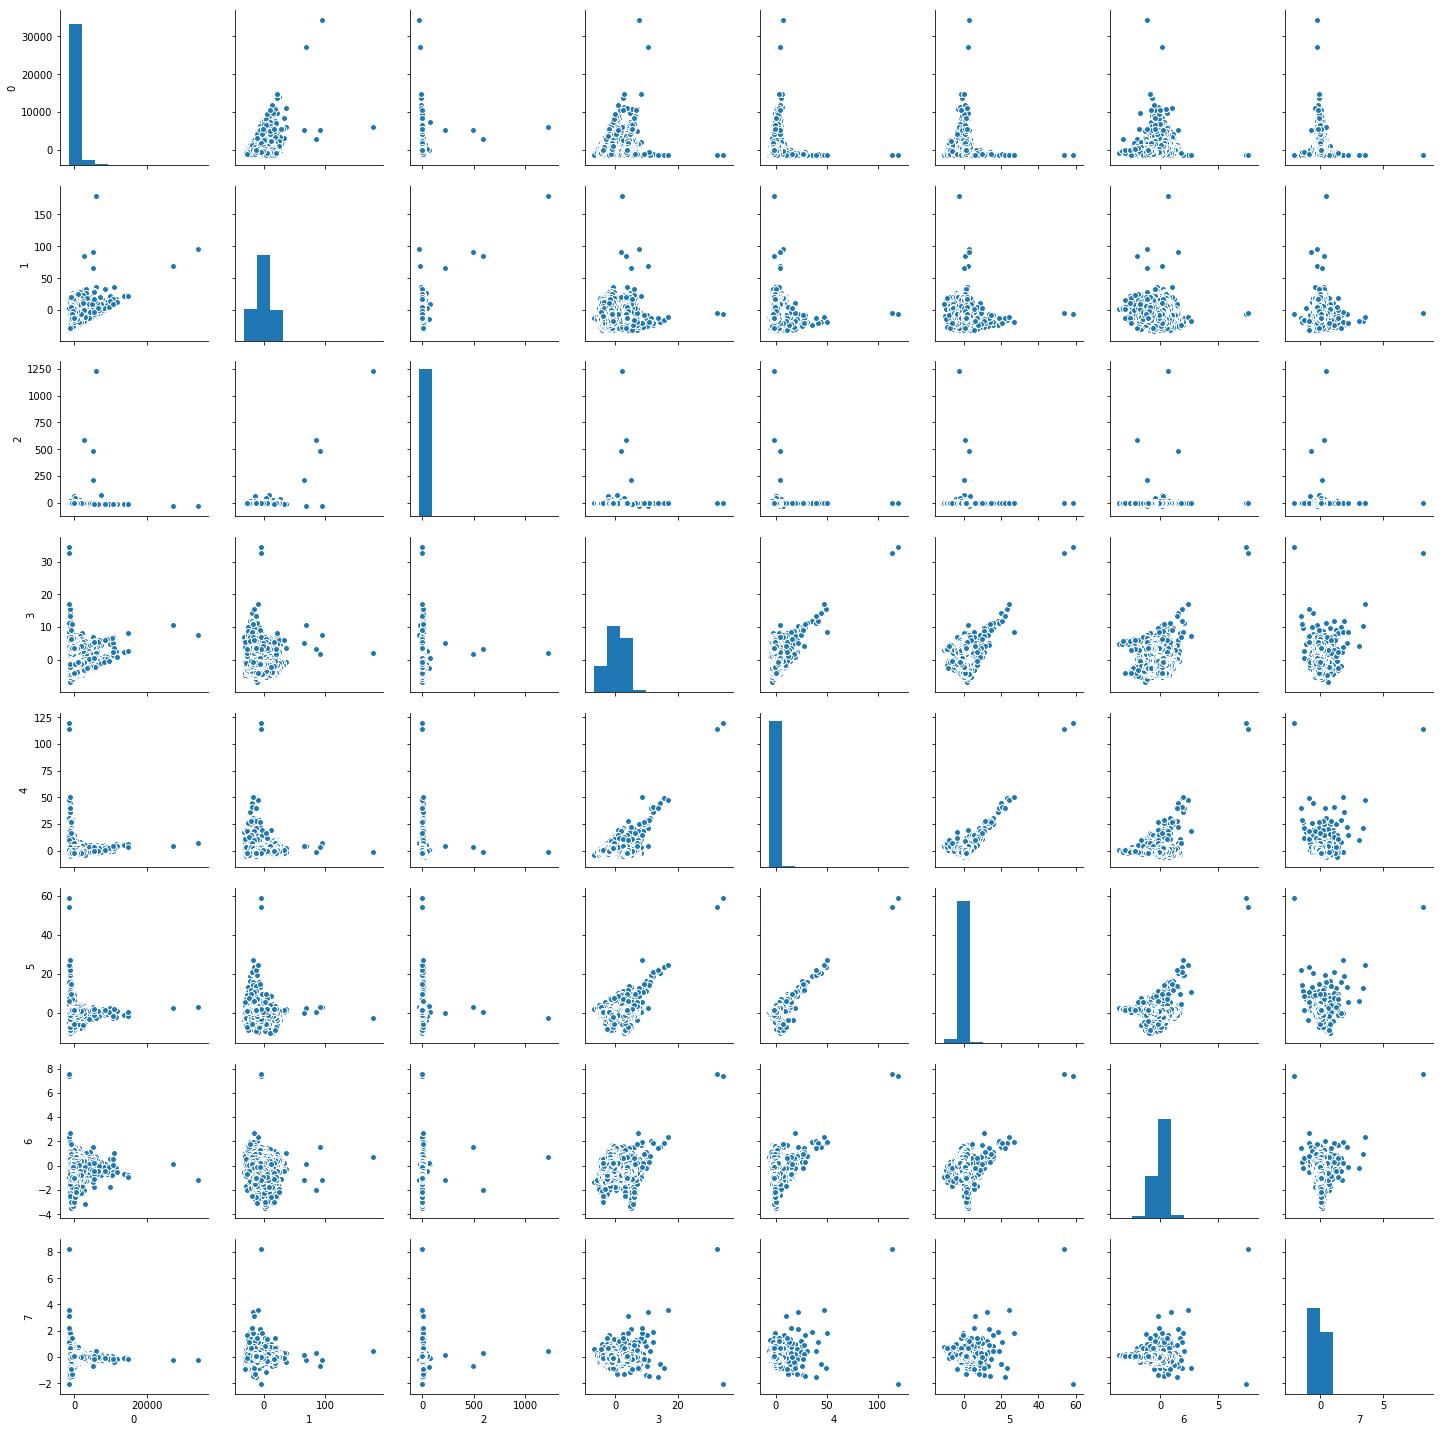

In [37]:
pca_obj = sklearn.decomposition.PCA()
cal_PCA = pca_obj.fit_transform(cal_df)
cal_PCA_df = pd.DataFrame(cal_PCA)
print(cal_PCA_df.describe())
seaborn.pairplot(cal_PCA_df)


print("explained variance by variable is")
print(pca_obj.explained_variance_ratio_)

The data after pca are definitely much more strongly clustered, and should be more informative. Both of the bimodal variables are gone, with more gaussian distributed variables left over.
